In [89]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
import xgboost as xgb




In [90]:
url = "https://raw.githubusercontent.com/Prakyatp/SupervisedPCA/main/dataset/alzheimers_disease_data.csv"
df = pd.read_csv(url)

warnings.filterwarnings("ignore")

In [91]:
df.shape

(2149, 35)

In [92]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [93]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [95]:
df = df.drop(columns=['DoctorInCharge'])

In [96]:
df.isnull().sum()

,0
PatientID,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
PhysicalActivity,0
DietQuality,0


In [97]:
duplicates = df[df.duplicated()]

if not duplicates.empty:
    print("\nDuplicate Rows:")
    print(duplicates)
else:
    print("\nNo duplicate rows found.")


No duplicate rows found.


In [98]:
class_distribution = df["Diagnosis"].value_counts()

print("\nClass Distribution:")
print(class_distribution)


Class Distribution:
Diagnosis
0    1389
1     760
Name: count, dtype: int64


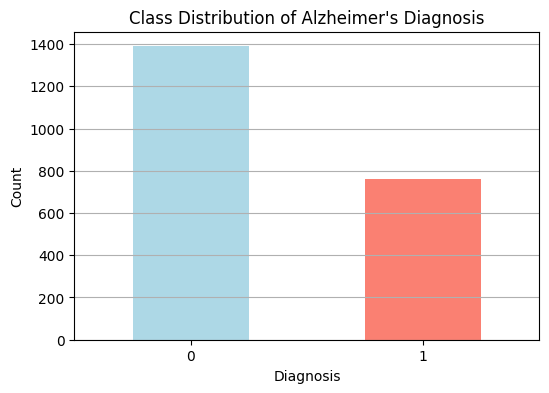

In [99]:
import matplotlib.pyplot as plt
class_distribution = df["Diagnosis"].value_counts()

plt.figure(figsize=(6, 4))
class_distribution.plot(kind="bar", color=["lightblue", "salmon"])
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.title("Class Distribution of Alzheimer's Diagnosis")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()


In [100]:
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

In [101]:
mean_X = np.mean(X, axis=0)
std_X = np.std(X, axis=0)

X_scaled = (X - mean_X) / std_X

In [102]:

X_scaled = np.array(X_scaled)  # Convert DataFrame to NumPy array
y = np.array(y)

# Define test size (20% test data)
test_size = 0.2
num_samples = X_scaled.shape[0]  # Total number of samples
num_test = int(num_samples * test_size)  # Number of test samples

# Generate shuffled indices
indices = np.arange(num_samples)  # Array of indices [0, 1, ..., num_samples-1]
np.random.seed(42)  # Set seed for reproducibility
np.random.shuffle(indices)  # Shuffle indices

# Split indices into training and testing sets
test_indices = indices[:num_test]  # First 'num_test' indices for test set
train_indices = indices[num_test:]  # Remaining indices for training set

# Use indices to split the data
X_train, X_test = X_scaled[train_indices], X_scaled[test_indices]
y_train, y_test = y[train_indices], y[test_indices]


In [103]:

def manual_oversampling(X_train, y_train):
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    unique_classes, class_counts = np.unique(y_train, return_counts=True)
    max_class_count = max(class_counts)

    X_resampled = []
    y_resampled = []

    for c in unique_classes:
        X_c = X_train[y_train == c]
        y_c = y_train[y_train == c]
        n_to_duplicate = max_class_count - len(X_c)

        # Add the original samples
        X_resampled.append(X_c)
        y_resampled.append(y_c)

        # Duplicate only the minority class to balance the dataset
        if n_to_duplicate > 0:
            indices_to_duplicate = np.random.choice(len(X_c), size=n_to_duplicate, replace=True)
            X_resampled.append(X_c[indices_to_duplicate])
            y_resampled.append(y_c[indices_to_duplicate])

    # Stack the resampled data
    X_resampled = np.vstack(X_resampled)
    y_resampled = np.hstack(y_resampled)

    return X_resampled, y_resampled

# Apply manual oversampling
X_train, y_train = manual_oversampling(X_train, y_train)


In [104]:
# Check the size of each class in the resampled target variable
unique_classes, class_counts = np.unique(y_train, return_counts=True)
for c, count in zip(unique_classes, class_counts):
    print(f"Class {c}: {count} samples")


Class 0: 1113 samples
Class 1: 1113 samples


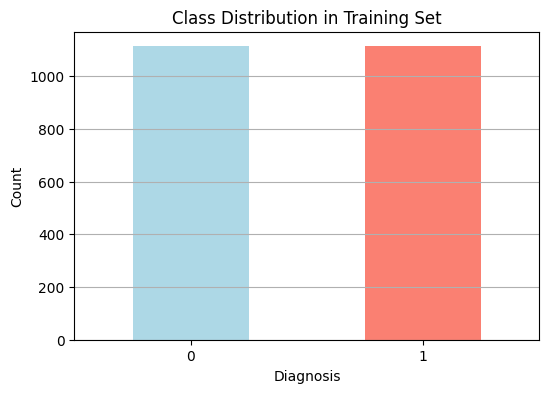

In [105]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert y_train to a pandas Series
y_train_series = pd.Series(y_train)

# Compute class distribution
class_distribution = y_train_series.value_counts()

# Bar plot for class distribution
plt.figure(figsize=(6, 4))
class_distribution.plot(kind="bar", color=["lightblue", "salmon"])
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.title("Class Distribution in Training Set")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()


In [106]:


# Define KNN model with default parameters
baseline_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
baseline_model.fit(X_train, y_train)

# Predictions on test set
y_pred_baseline = baseline_model.predict(X_test)

# Evaluate on both training and test data
train_accuracy = baseline_model.score(X_train, y_train)
test_accuracy = accuracy_score(y_test, y_pred_baseline)

# Display results
print("Baseline KNN Model Training Accuracy:", train_accuracy)
print("Baseline KNN Model Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_baseline))
print("Classification Report:\n", classification_report(y_test, y_pred_baseline))


Baseline KNN Model Training Accuracy: 0.8495058400718778
Baseline KNN Model Test Accuracy: 0.6713286713286714
Confusion Matrix:
 [[194  82]
 [ 59  94]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.70      0.73       276
           1       0.53      0.61      0.57       153

    accuracy                           0.67       429
   macro avg       0.65      0.66      0.65       429
weighted avg       0.68      0.67      0.68       429



In [107]:
# Supervised PCA implementation
class SupervisedPCA:
    def __init__(self, n_components):
        self.n_components = n_components

    def fit(self, X, y):
        # Compute the mean of X
        mean_X = np.mean(X, axis=0)
        X_centered = X - mean_X

        # Compute covariance matrix
        cov_matrix = np.cov(X_centered, rowvar=False)

        # Eigen decomposition of covariance matrix
        eigvals, eigvecs = np.linalg.eigh(cov_matrix)

        # Sort eigenvalues and eigenvectors in descending order
        sorted_indices = np.argsort(eigvals)[::-1]
        eigvals = eigvals[sorted_indices]
        eigvecs = eigvecs[:, sorted_indices]

        # Select top n_components
        self.components_ = eigvecs[:, :self.n_components]

        # Project the data onto the principal components
        self.X_pca = np.dot(X_centered, self.components_)

        return self

    def transform(self, X):
        mean_X = np.mean(X, axis=0)
        X_centered = X - mean_X
        return np.dot(X_centered, self.components_)



In [108]:
# Apply Supervised PCA
n_components = 28  # Example number of components
supervised_pca = SupervisedPCA(n_components=n_components)
supervised_pca.fit(X_train, y_train)

# Transform training and test data
X_train_pca = supervised_pca.transform(X_train)
X_test_pca = supervised_pca.transform(X_test)

# Using Logistic Regression as the classifier after Supervised PCA
model_with_pca = LogisticRegression()
model_with_pca.fit(X_train_pca, y_train)

# Predictions
y_pred_pca = model_with_pca.predict(X_test_pca)

# Evaluation
print("Supervised PCA Model training Accuracy:", model_with_pca.score(X_train_pca, y_train))
print("Supervised PCA Model testing Accuracy:", accuracy_score(y_test, y_pred_pca))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_pca))
print("Classification Report:\n", classification_report(y_test, y_pred_pca))


Supervised PCA Model training Accuracy: 0.8050314465408805
Supervised PCA Model testing Accuracy: 0.7808857808857809
Confusion Matrix:
 [[205  71]
 [ 23 130]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.74      0.81       276
           1       0.65      0.85      0.73       153

    accuracy                           0.78       429
   macro avg       0.77      0.80      0.77       429
weighted avg       0.81      0.78      0.79       429



In [109]:
unique_classes, class_counts = np.unique(y_train, return_counts=True)
print("Balanced Class Distribution:", dict(zip(unique_classes, class_counts)))


Balanced Class Distribution: {0: 1113, 1: 1113}


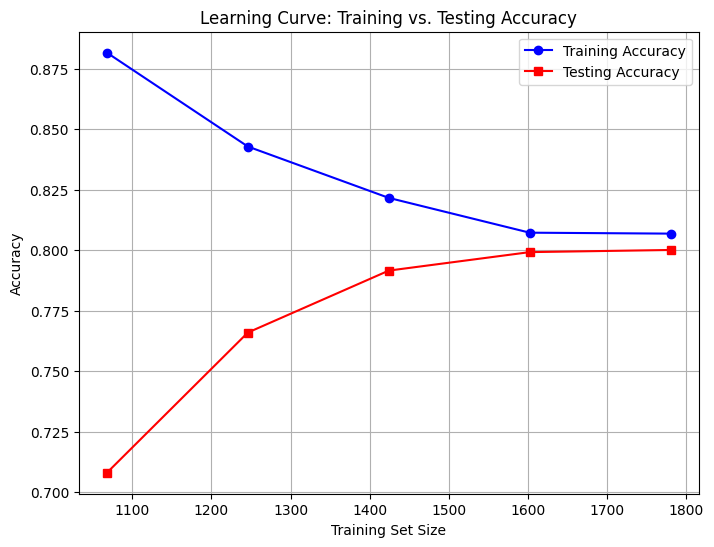

In [110]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

# Define model
log_reg = LogisticRegression()

# Generate learning curve data (Training & Testing)
train_sizes, train_scores, test_scores = learning_curve(
    log_reg, X_train_pca, y_train, cv=5, scoring="accuracy", train_sizes=np.linspace(0.1, 1.0, 10)
)

# Compute mean accuracy for training & testing
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, "o-", label="Training Accuracy", color="blue")
plt.plot(train_sizes, test_mean, "s-", label="Testing Accuracy", color="red")

# Formatting
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve: Training vs. Testing Accuracy")
plt.legend()
plt.grid(True)
plt.show()


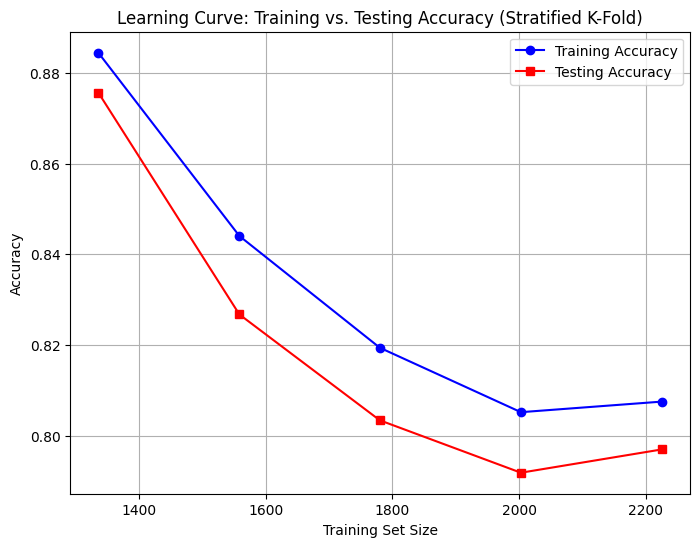

In [111]:
import numpy as np
import matplotlib.pyplot as plt

def stratified_kfold(X, y, k):
    """Custom implementation of Stratified K-Fold cross-validation."""
    unique_classes, class_counts = np.unique(y, return_counts=True)

    # Create indices grouped by class
    class_indices = {cls: np.where(y == cls)[0] for cls in unique_classes}

    # Shuffle indices for each class
    for cls in unique_classes:
        np.random.shuffle(class_indices[cls])

    # Split indices into k folds
    folds = [[] for _ in range(k)]

    for cls in unique_classes:
        split_indices = np.array_split(class_indices[cls], k)  # Split class indices into k parts
        for i in range(k):
            folds[i].extend(split_indices[i])  # Assign to each fold

    return folds

def compute_learning_curve(model, X, y, k=5, train_sizes=np.linspace(0.1, 1.0, 10)):
    """Computes learning curve using Stratified K-Fold"""
    train_sizes = (train_sizes * len(X)).astype(int)
    train_accuracies, test_accuracies = [], []

    for size in train_sizes:
        folds = stratified_kfold(X[:size], y[:size], k)  # Get stratified folds

        fold_train_acc, fold_test_acc = [], []

        for i in range(k):
            test_idx = np.array(folds[i])
            train_idx = np.array([idx for j in range(k) if j != i for idx in folds[j]])

            X_train_fold, X_test_fold = X[train_idx], X[test_idx]
            y_train_fold, y_test_fold = y[train_idx], y[test_idx]

            # Ensure at least 2 classes in training set
            if len(np.unique(y_train_fold)) < 2:
                continue

            # Train model
            model.fit(X_train_fold, y_train_fold)

            # Compute accuracy
            fold_train_acc.append(model.score(X_train_fold, y_train_fold))
            fold_test_acc.append(model.score(X_test_fold, y_test_fold))

        # Compute mean accuracy across folds
        train_accuracies.append(np.mean(fold_train_acc))
        test_accuracies.append(np.mean(fold_test_acc))

    return train_sizes, train_accuracies, test_accuracies

# Train the model and compute learning curve
model = LogisticRegression()
train_sizes, train_acc, test_acc = compute_learning_curve(model, X_train_pca, y_train)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_acc, "o-", label="Training Accuracy", color="blue")
plt.plot(train_sizes, test_acc, "s-", label="Testing Accuracy", color="red")

# Formatting
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve: Training vs. Testing Accuracy (Stratified K-Fold)")
plt.legend()
plt.grid(True)
plt.show()


In [112]:

# Apply Supervised PCA
n_components = 28  # Example number of components
supervised_pca = SupervisedPCA(n_components=n_components)
supervised_pca.fit(X_train, y_train)

# Transform training and test data
X_train_pca = supervised_pca.transform(X_train)
X_test_pca = supervised_pca.transform(X_test)

# Using XGBoost as the classifier after Supervised PCA
model_with_pca = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_with_pca.fit(X_train_pca, y_train)

# Predictions
y_pred_pca = model_with_pca.predict(X_test_pca)

# Evaluation
print("Supervised PCA + XGBoost Model Training Accuracy:", model_with_pca.score(X_train_pca, y_train))
print("Supervised PCA + XGBoost Model Testing Accuracy:", accuracy_score(y_test, y_pred_pca))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_pca))
print("Classification Report:\n", classification_report(y_test, y_pred_pca))


Supervised PCA + XGBoost Model Training Accuracy: 1.0
Supervised PCA + XGBoost Model Testing Accuracy: 0.8018648018648019
Confusion Matrix:
 [[230  46]
 [ 39 114]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84       276
           1       0.71      0.75      0.73       153

    accuracy                           0.80       429
   macro avg       0.78      0.79      0.79       429
weighted avg       0.80      0.80      0.80       429



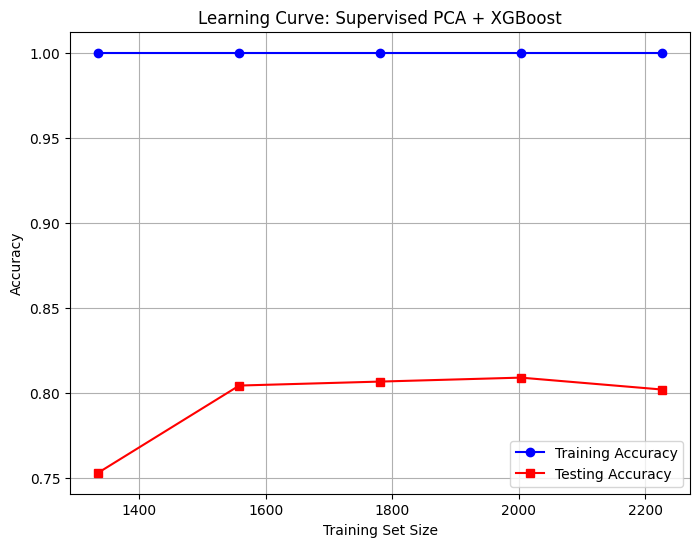

In [113]:
import numpy as np
import matplotlib.pyplot as plt

# Define training set sizes
train_sizes = np.linspace(0.1, 1.0, 10)  # 10 different sizes from 10% to 100%
train_sizes = (train_sizes * len(X_train_pca)).astype(int)  # Convert to absolute sizes

train_accuracies = []
test_accuracies = []

for size in train_sizes:
    # Select subset of training data
    X_train_sub = X_train_pca[:size]
    y_train_sub = y_train[:size]

    # Ensure that the subset contains at least two classes
    if len(np.unique(y_train_sub)) < 2:
        train_accuracies.append(np.nan)
        test_accuracies.append(np.nan)
        continue

    # Train the model
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    model.fit(X_train_sub, y_train_sub)

    # Compute accuracy
    train_accuracies.append(model.score(X_train_sub, y_train_sub))
    test_accuracies.append(model.score(X_test_pca, y_test))

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_accuracies, "o-", label="Training Accuracy", color="blue")
plt.plot(train_sizes, test_accuracies, "s-", label="Testing Accuracy", color="red")

# Formatting
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve: Supervised PCA + XGBoost")
plt.legend()
plt.grid(True)
plt.show()


In [114]:
def tune_model(model_name, X_train_pca, y_train, X_test_pca, y_test):
    best_acc = 0
    best_params = None
    best_model = None

    if model_name == "LogisticRegression":
        penalty_values = ["l1", "l2"]  # Regularization types
        C_values = [0.01, 0.1, 1, 10]  # Inverse regularization strength
        for penalty in penalty_values:
            for C in C_values:
                try:
                    model = LogisticRegression(penalty=penalty, C=C, solver='liblinear')
                    model.fit(X_train_pca, y_train)
                    y_pred = model.predict(X_test_pca)
                    acc = accuracy_score(y_test, y_pred)

                    if acc > best_acc:
                        best_acc = acc
                        best_params = {"penalty": penalty, "C": C}
                        best_model = model
                except:
                    continue

    elif model_name == "XGBoost":
        learning_rates = [0.01, 0.1, 0.2]  # Learning rate values
        max_depth_values = [3, 6, 9]  # Maximum depth values
        for lr in learning_rates:
            for max_depth in max_depth_values:
                model = xgb.XGBClassifier(learning_rate=lr, max_depth=max_depth, n_estimators=100, random_state=42, eval_metric="logloss")
                model.fit(X_train_pca, y_train)
                y_pred = model.predict(X_test_pca)
                acc = accuracy_score(y_test, y_pred)

                if acc > best_acc:
                    best_acc = acc
                    best_params = {"learning_rate": lr, "max_depth": max_depth}
                    best_model = model

    print(f"Best Model for {model_name}: {best_params} with Accuracy: {best_acc}")
    return best_model


# Apply Supervised PCA
n_components = 28  # Example number of components
supervised_pca = SupervisedPCA(n_components=n_components)
supervised_pca.fit(X_train, y_train)

# Transform training and test data
X_train_pca = supervised_pca.transform(X_train)
X_test_pca = supervised_pca.transform(X_test)

# Tune and train models
best_lr = tune_model("LogisticRegression", X_train_pca, y_train, X_test_pca, y_test)
best_xgb = tune_model("XGBoost", X_train_pca, y_train, X_test_pca, y_test)


Best Model for LogisticRegression: {'penalty': 'l1', 'C': 0.1} with Accuracy: 0.7902097902097902
Best Model for XGBoost: {'learning_rate': 0.2, 'max_depth': 9} with Accuracy: 0.8205128205128205


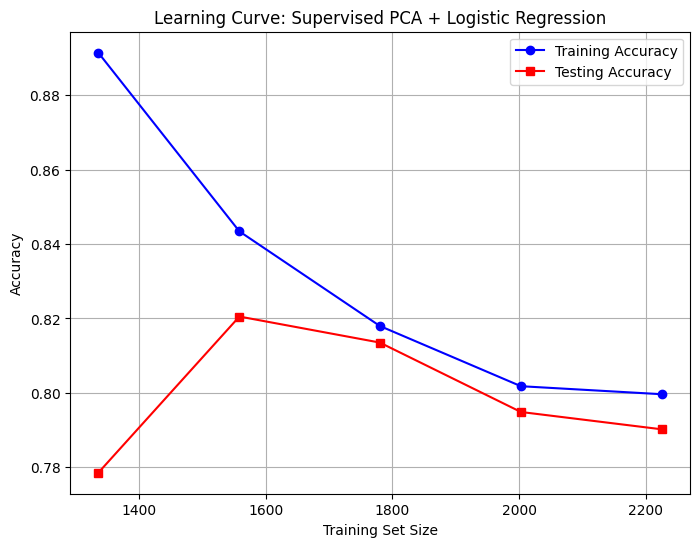

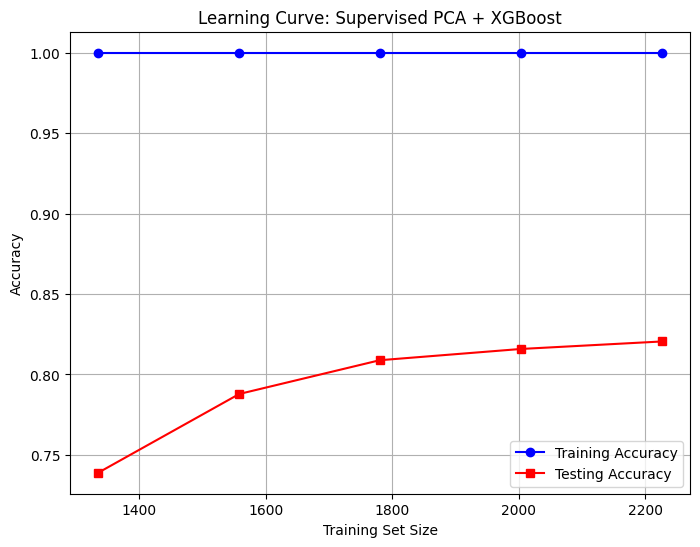

In [115]:
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve(model, X_train_pca, y_train, X_test_pca, y_test, title):
    train_sizes = np.linspace(0.1, 1.0, 10)  # Training sizes from 10% to 100%
    train_sizes = (train_sizes * len(X_train_pca)).astype(int)  # Convert to absolute sizes

    train_accuracies = []
    test_accuracies = []

    for size in train_sizes:
        # Select subset of training data
        X_train_sub = X_train_pca[:size]
        y_train_sub = y_train[:size]

        # Ensure the subset contains at least two classes
        if len(np.unique(y_train_sub)) < 2:
            train_accuracies.append(np.nan)
            test_accuracies.append(np.nan)
            continue

        # Train the model
        model.fit(X_train_sub, y_train_sub)

        # Compute accuracy
        train_accuracies.append(model.score(X_train_sub, y_train_sub))
        test_accuracies.append(model.score(X_test_pca, y_test))

    # Plot learning curve
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_accuracies, "o-", label="Training Accuracy", color="blue")
    plt.plot(train_sizes, test_accuracies, "s-", label="Testing Accuracy", color="red")

    # Formatting
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.title(f"Learning Curve: {title}")
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot learning curve for best-tuned models
plot_learning_curve(best_lr, X_train_pca, y_train, X_test_pca, y_test, "Supervised PCA + Logistic Regression")
plot_learning_curve(best_xgb, X_train_pca, y_train, X_test_pca, y_test, "Supervised PCA + XGBoost")
